In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
df = pd.read_csv('ClimateRelatedDisasters.csv')
print(df.head(10))

   ObjectId                       Country ISO2 ISO3  \
0         1  Afghanistan, Islamic Rep. of   AF  AFG   
1         2  Afghanistan, Islamic Rep. of   AF  AFG   
2         3  Afghanistan, Islamic Rep. of   AF  AFG   
3         4  Afghanistan, Islamic Rep. of   AF  AFG   
4         5  Afghanistan, Islamic Rep. of   AF  AFG   
5         6  Afghanistan, Islamic Rep. of   AF  AFG   
6         7  Afghanistan, Islamic Rep. of   AF  AFG   
7         8                       Albania   AL  ALB   
8         9                       Albania   AL  ALB   
9        10                       Albania   AL  ALB   

                                           Indicator       Unit  \
0  Climate related disasters frequency, Number of...  Number of   
1  Climate related disasters frequency, Number of...  Number of   
2  Climate related disasters frequency, Number of...  Number of   
3  Climate related disasters frequency, Number of...  Number of   
4  Climate related disasters frequency, Number of...  Numbe

In [ ]:
column_names = df.columns
print(column_names)


Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1980', 'F1981',
       'F1982', 'F1983', 'F1984', 'F1985', 'F1986', 'F1987', 'F1988', 'F1989',
       'F1990', 'F1991', 'F1992', 'F1993', 'F1994', 'F1995', 'F1996', 'F1997',
       'F1998', 'F1999', 'F2000', 'F2001', 'F2002', 'F2003', 'F2004', 'F2005',
       'F2006', 'F2007', 'F2008', 'F2009', 'F2010', 'F2011', 'F2012', 'F2013',
       'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020', 'F2021',
       'F2022'],
      dtype='object')


In [26]:
new_columns = {col: col[1:] for col in df.columns[10:]}
df.rename(columns=new_columns, inplace=True)
df.to_csv("ClimateRelatedDisasters.csv", index=False)



In [63]:
column_names = df.columns
print(column_names)

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022'],
      dtype='object')


In [47]:
indicators = df['Indicator'].unique()
print(indicators)

['Climate related disasters frequency, Number of Disasters: Drought'
 'Climate related disasters frequency, Number of Disasters: Extreme temperature'
 'Climate related disasters frequency, Number of Disasters: Flood'
 'Climate related disasters frequency, Number of Disasters: Landslide'
 'Climate related disasters frequency, Number of Disasters: Storm'
 'Climate related disasters frequency, Number of Disasters: TOTAL'
 'Climate related disasters frequency, Number of Disasters: Wildfire']


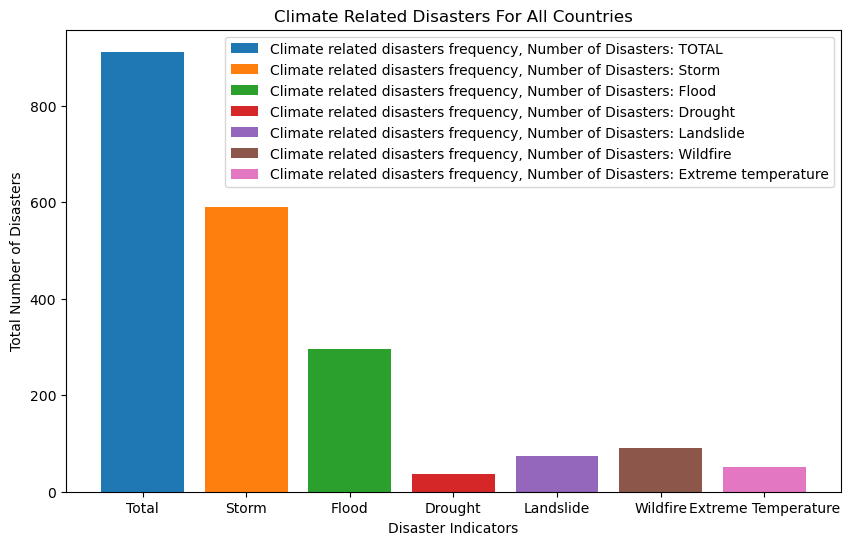

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ClimateRelatedDisasters.csv')

desired_indicators = [
    "Climate related disasters frequency, Number of Disasters: TOTAL",
    "Climate related disasters frequency, Number of Disasters: Storm",
    "Climate related disasters frequency, Number of Disasters: Flood",
    "Climate related disasters frequency, Number of Disasters: Drought",
    "Climate related disasters frequency, Number of Disasters: Landslide",
    "Climate related disasters frequency, Number of Disasters: Wildfire",
    "Climate related disasters frequency, Number of Disasters: Extreme temperature"
]

filtered_df = df[df['Indicator'].isin(desired_indicators)]

filtered_df['Total_Disasters'] = filtered_df[['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
                                              '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
                                              '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
                                              '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
                                              '2020', '2021', '2022']].sum(axis=1)

plt.figure(figsize=(10, 6))
colors = plt.cm.tab10(range(len(desired_indicators)))  
for i, indicator in enumerate(desired_indicators):
    indicator_data = filtered_df[filtered_df['Indicator'] == indicator]
    plt.bar(indicator_data['Indicator'], indicator_data['Total_Disasters'], color=colors[i], label=indicator)

plt.title("Climate Related Disasters For All Countries")
plt.xlabel('Disaster Indicators')
plt.ylabel('Total Number of Disasters')
plt.xticks(rotation=0)
plt.xticks(ticks=range(len(desired_indicators)), labels=[
    "Total", "Storm", "Flood", "Drought", "Landslide", "Wildfire", "Extreme Temperature"
])
plt.legend()
plt.grid(False)
plt.show()





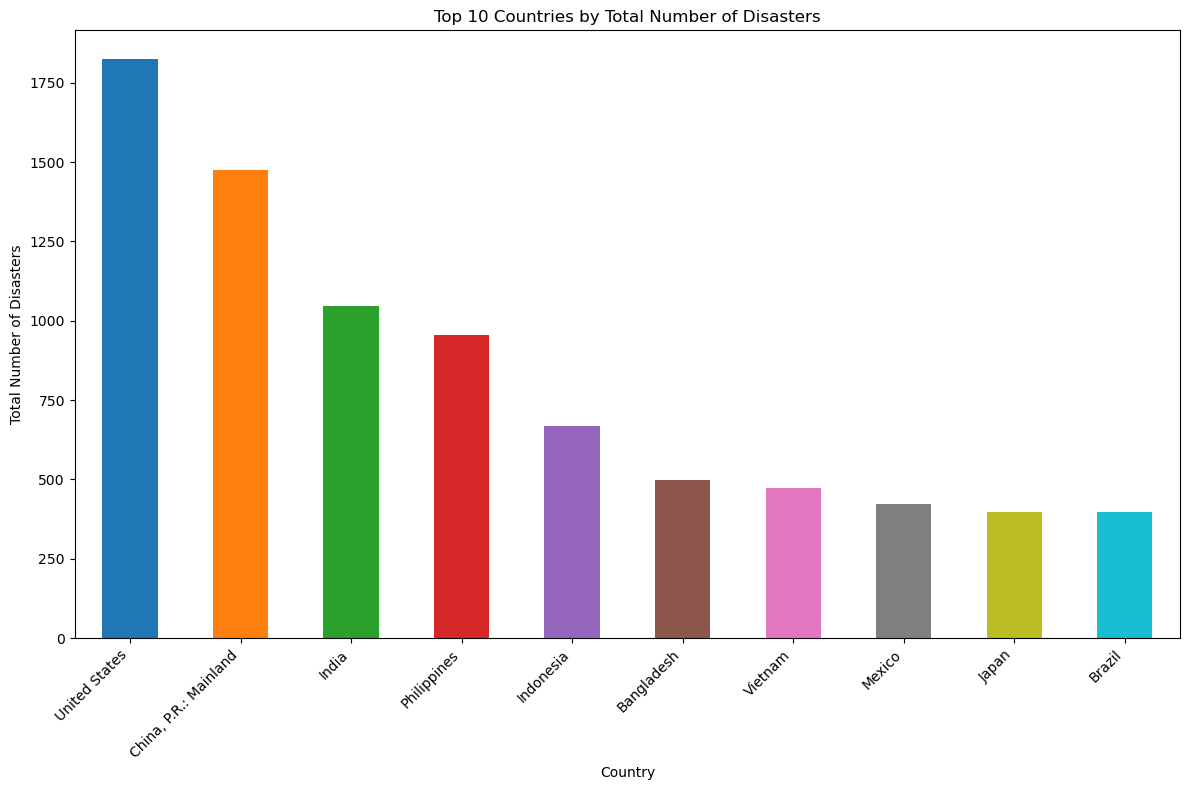

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

country_totals = filtered_df.groupby('Country')['Total_Disasters'].sum()
sorted_countries = country_totals.sort_values(ascending=False)
top_10_countries = sorted_countries.head(10)

palette = sns.color_palette("tab10", 10)

plt.figure(figsize=(12, 8))
top_10_countries.plot(kind='bar', color=palette)
plt.xlabel('Country')
plt.ylabel('Total Number of Disasters')
plt.title('Top 10 Countries by Total Number of Disasters')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(False)
plt.show()

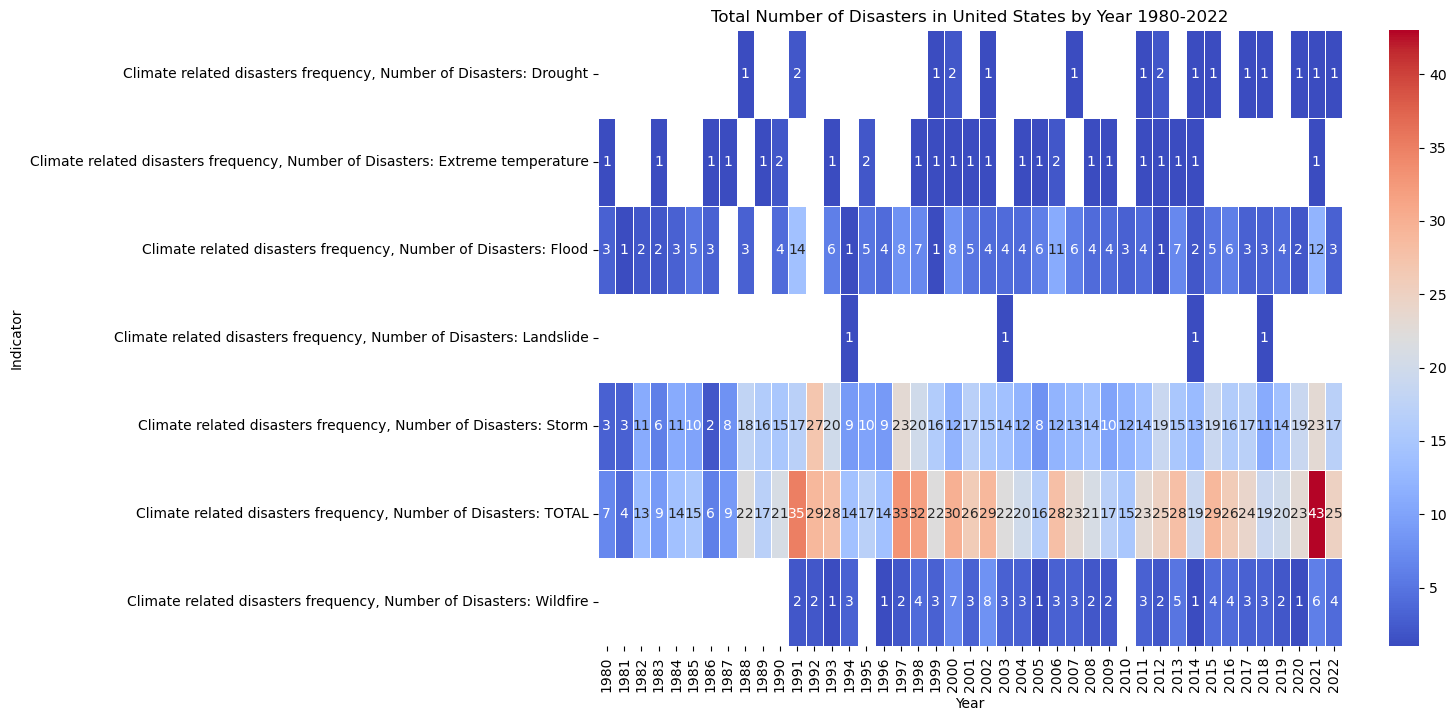

In [13]:
import seaborn as sns

us_subset = filtered_df[(filtered_df['Country'] == 'United States') & (filtered_df['Indicator'].isin(desired_indicators))].copy()

heatmap_data = us_subset.pivot_table(index='Indicator', values=['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
                                              '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
                                              '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
                                              '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
                                              '2020', '2021', '2022'])


plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f", linewidths=.5)
plt.title('Total Number of Disasters in United States by Year 1980-2022')
plt.xlabel('Year')
plt.ylabel('Indicator')
plt.show()



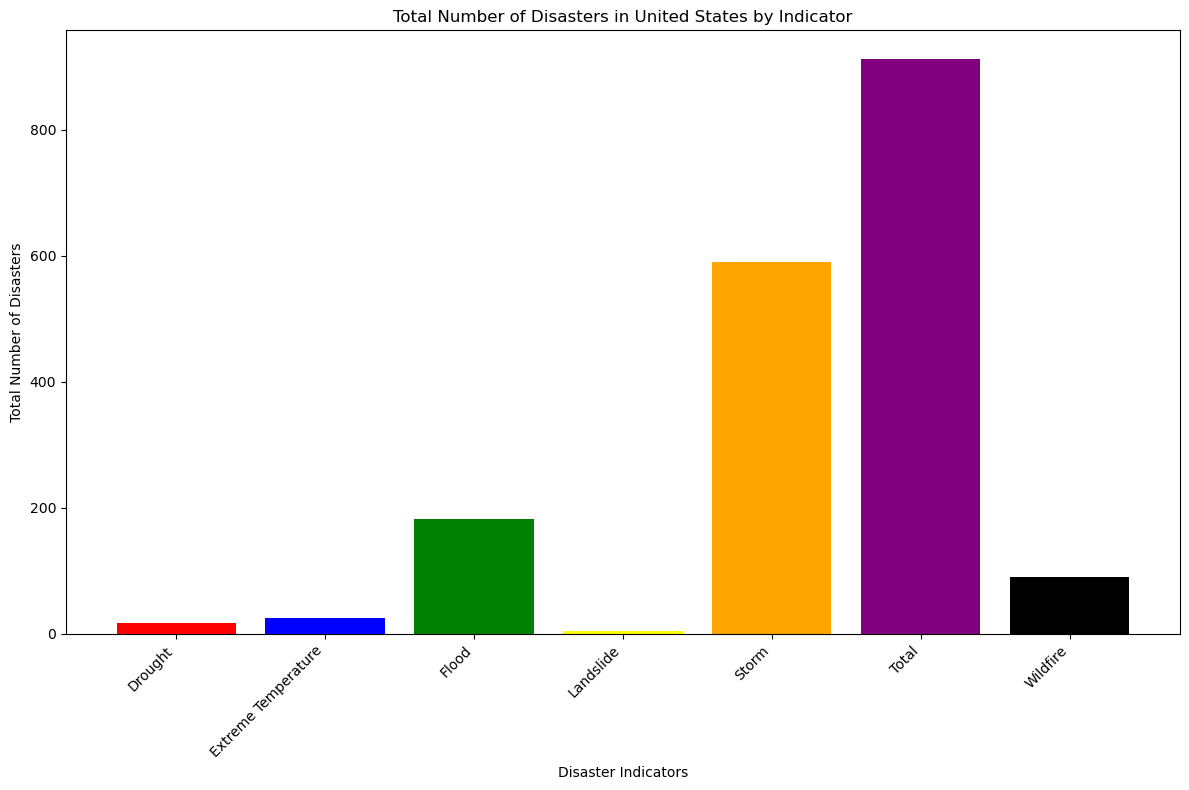

In [12]:
import matplotlib.pyplot as plt

us_subset = filtered_df[(filtered_df['Country'] == 'United States') & (filtered_df['Indicator'].isin(desired_indicators))].copy()

us_subset.loc[:, 'Total_Disasters'] = us_subset[['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
                                              '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
                                              '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
                                              '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
                                              '2020', '2021', '2022']].sum(axis=1)

colors = ['red', 'blue', 'green', 'yellow','orange','purple','black']

plt.figure(figsize=(12, 8))
plt.bar(us_subset['Indicator'], us_subset['Total_Disasters'], color=colors)
plt.xlabel('Disaster Indicators')
plt.ylabel('Total Number of Disasters')
plt.title('Total Number of Disasters in United States by Indicator')
plt.xticks(rotation=45, ha='right')
plt.xticks(ticks=range(len(desired_indicators)), labels=[
    "Drought", "Extreme Temperature", "Flood", "Landslide", "Storm", "Total", "Wildfire"
])
plt.tight_layout()
plt.grid(False)
plt.show()

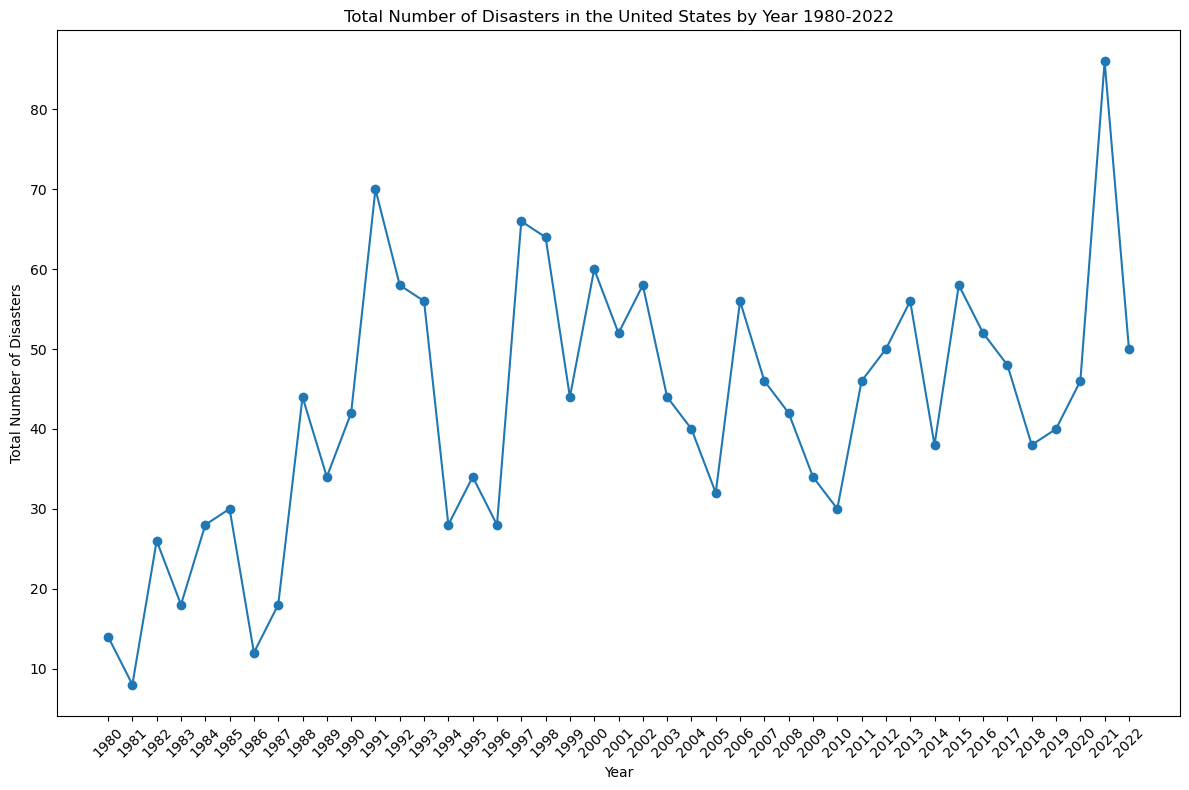

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(us_subset.columns[10:-1], us_subset.iloc[:, 10:-1].sum(axis=0), marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Number of Disasters')
plt.title('Total Number of Disasters in the United States by Year 1980-2022')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
